In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../Data/train.csv')

In [9]:
df

,id,playtime_forever,is_free,price,genres,categories,tags,purchase_date,release_date,total_positive_reviews,total_negative_reviews
0,0,0.000000,False,3700.0,"Adventure,Casual,Indie","Single-player,Steam Trading Cards,Steam Cloud","Indie,Adventure,Story Rich,Casual,Atmospheric,...","Jul 2, 2018","10 Dec, 2013",372.0,96.0
1,1,0.016667,True,0.0,RPG,"Single-player,Partial Controller Support","Mod,Utilities,RPG,Game Development,Singleplaye...","Nov 26, 2016","12 Aug, 2015",23.0,0.0
2,2,0.000000,False,5000.0,"Adventure,Casual,Indie","Single-player,Full controller support,Steam Tr...","Point & Click,Adventure,Story Rich,Comedy,Indi...","Jul 2, 2018","28 Jan, 2014",3018.0,663.0
3,3,1.533333,False,9900.0,"Action,RPG","Single-player,Multi-player,Steam Achievements,...","Medieval,RPG,Open World,Strategy,Sandbox,Actio...","Nov 28, 2016","31 Mar, 2010",63078.0,1746.0
4,4,22.333333,False,4800.0,"Action,Indie,Strategy","Single-player,Co-op,Steam Achievements,Full co...","Tower Defense,Co-op,Action,Strategy,Online Co-...","Mar 4, 2018","30 Jul, 2012",8841.0,523.0
5,5,2.933333,False,25800.0,RPG,"Single-player,Online Co-op,Local Co-op,Shared/...","RPG,Open World,Survival,Co-op,Fantasy,Online C...",NaN,"26 Mar, 2019",NaN,NaN
6,6,2.616667,False,3600.0,"Action,Indie","Single-player,Steam Achievements,Steam Trading...","Great Soundtrack,Action,Violent,Indie,Top-Down...","Feb 16, 2018","23 Oct, 2012",39776.0,1035.0
7,7,0.150000,True,0.0,Simulation,"Single-player,Multi-player,Online Multi-Player...","VR,Simulation,Utilities,Multiplayer","Jan 29, 2018","28 Apr, 2016",33.0,3.0
8,8,0.016667,False,4000.0,"Adventure,RPG","Single-player,Steam Achievements,Steam Trading...","RPG,Turn-Based,Adventure,Fantasy,Great Soundtr...","Nov 23, 2018","25 Feb, 2014",1875.0,39.0
9,9,0.016667,False,8800.0,"Action,Adventure","Single-player,Steam Achievements,SteamVR Colle...","Action,Adventure,VR,Shooter,Puzzle,FPS,First-P...","Dec 22, 2017","17 Oct, 2017",47.0,11.0


In [10]:
df.columns

Index(['id', 'playtime_forever', 'is_free', 'price', 'genres', 'categories',
       'tags', 'purchase_date', 'release_date', 'total_positive_reviews',
       'total_negative_reviews'],
      dtype='object')

In [11]:
df['playtime_forever'].max()

113.8

In [12]:
df['playtime_forever'].min()

0.0

In [13]:
df['price'].max()

15999900.0

In [14]:
df['price'].min()

0.0

In [16]:
df[df['price']==15999900.0]

,id,playtime_forever,is_free,price,genres,categories,tags,purchase_date,release_date,total_positive_reviews,total_negative_reviews
220,220,9.683333,False,15999900.0,"Action,Adventure","Single-player,Multi-player,Steam Achievements,...","Adventure,Action,Female Protagonist,Third Pers...","Oct 2, 2017","4 Mar, 2013",77254.0,3407.0


In [37]:
# cat_l = df['categories'].unique().tolist()

In [38]:
# len(cat_l)

## For types

In [39]:
all_cat = {}
for item in df.iterrows():
    for attr in item[1]['categories'].split(','):
        if attr not in all_cat.keys():
            all_cat[attr] = 1
        else:
            all_cat[attr] += 1

In [40]:
all_cat

{'Single-player': 342,
 'Steam Trading Cards': 238,
 'Steam Cloud': 219,
 'Partial Controller Support': 66,
 'Full controller support': 150,
 'Multi-player': 102,
 'Steam Achievements': 268,
 'Steam Workshop': 52,
 'Co-op': 69,
 'Steam Leaderboards': 53,
 'Online Co-op': 32,
 'Local Co-op': 21,
 'Shared/Split Screen': 34,
 'Stats': 27,
 'Online Multi-Player': 47,
 'Cross-Platform Multiplayer': 31,
 'SteamVR Collectibles': 6,
 'Local Multi-Player': 13,
 'Remote Play on Phone': 16,
 'Remote Play on Tablet': 17,
 'Remote Play on TV': 10,
 'Valve Anti-Cheat enabled': 13,
 'Commentary available': 7,
 'Captions available': 30,
 'Includes level editor': 37,
 'In-App Purchases': 14,
 'VR Support': 10,
 'MMO': 7,
 'Includes Source SDK': 2}

In [41]:
df[df['categories'].str.contains('Single-player')]['playtime_forever'].mean()

2.9410818713450295

In [65]:
forever_mean_cat = []
for key in all_cat.keys():
#     print(key)
    forever_mean_cat.append(df[df['categories'].str.contains(key)]['playtime_forever'].mean())

<BarContainer object of 29 artists>

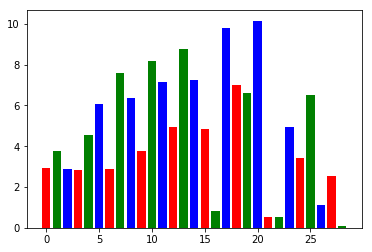

In [66]:
name_list = all_cat.keys()
num_list = forever_mean_cat
plt.bar(range(len(num_list)), num_list,color='rgb')

In [57]:
len(all_cat)

29

In [58]:
# 29 dim for type

## For genres

In [60]:
all_genres = {}
for item in df.iterrows():
    for attr in item[1]['genres'].split(','):
        if attr not in all_genres.keys():
            all_genres[attr] = 1
        else:
            all_genres[attr] += 1

In [61]:
all_genres

{'Adventure': 184,
 'Casual': 34,
 'Indie': 185,
 'RPG': 103,
 'Action': 171,
 'Strategy': 82,
 'Simulation': 65,
 'Racing': 2,
 'Sports': 4,
 'Massively Multiplayer': 14,
 'Sexual Content': 2,
 'Violent': 6,
 'Free to Play': 19,
 'Early Access': 9,
 'Audio Production': 1,
 'Gore': 5,
 'Design & Illustration': 2,
 'Nudity': 1,
 'Animation & Modeling': 1,
 'Utilities': 1}

<BarContainer object of 20 artists>

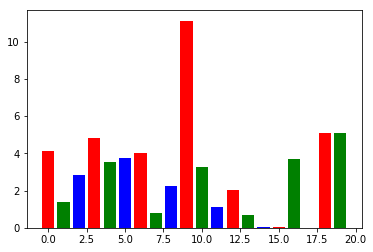

In [67]:
forever_mean_gre = []
for key in all_genres.keys():
#     print(key)
    forever_mean_gre.append(df[df['genres'].str.contains(key)]['playtime_forever'].mean())

name_list = all_genres.keys()
num_list = forever_mean_gre
plt.bar(range(len(num_list)), num_list,color='rgb')

In [68]:
len(all_genres)

20

In [69]:
# 20 dim for genre

## For tags

In [70]:
df['tags'].unique()

array(['Indie,Adventure,Story Rich,Casual,Atmospheric,Exploration,First-Person,Stealth,Choices Matter,Singleplayer,Walking Simulator,Short,Drama',
       'Mod,Utilities,RPG,Game Development,Singleplayer,Free to Play',
       'Point & Click,Adventure,Story Rich,Comedy,Indie,Funny,Kickstarter,Great Soundtrack,Singleplayer,Puzzle,Casual,Female Protagonist,2D,Masterpiece,Classic,Retro,Cult Classic,Crowdfunded,Episodic,Sci-fi',
       'Medieval,RPG,Open World,Strategy,Sandbox,Action,Multiplayer,Moddable,Military,Adventure,Horses,Realistic,Singleplayer,First-Person,Historical,Third Person,Simulation,Hack and Slash,Fantasy,Indie',
       'Tower Defense,Co-op,Action,Strategy,Online Co-Op,Indie,Third Person,Fantasy,Multiplayer,Funny,Comedy,Third-Person Shooter,Singleplayer,Cartoony,RPG,Shooter,Adventure,Female Protagonist,Great Soundtrack,Controller',
       'RPG,Open World,Survival,Co-op,Fantasy,Online Co-Op,Adventure,Local Co-Op,Singleplayer,Exploration,Split Screen,Souls-like,Third Person,At

In [71]:
all_tags = {}
for item in df.iterrows():
    for attr in item[1]['tags'].split(','):
        if attr not in all_tags.keys():
            all_tags[attr] = 1
        else:
            all_tags[attr] += 1

In [72]:
all_tags

{'Indie': 207,
 'Adventure': 268,
 'Story Rich': 146,
 'Casual': 65,
 'Atmospheric': 187,
 'Exploration': 63,
 'First-Person': 80,
 'Stealth': 31,
 'Choices Matter': 42,
 'Singleplayer': 302,
 'Walking Simulator': 25,
 'Short': 25,
 'Drama': 5,
 'Mod': 3,
 'Utilities': 3,
 'RPG': 132,
 'Game Development': 1,
 'Free to Play': 24,
 'Point & Click': 49,
 'Comedy': 55,
 'Funny': 66,
 'Kickstarter': 17,
 'Great Soundtrack': 170,
 'Puzzle': 79,
 'Female Protagonist': 56,
 '2D': 81,
 'Masterpiece': 86,
 'Classic': 39,
 'Retro': 30,
 'Cult Classic': 14,
 'Crowdfunded': 7,
 'Episodic': 9,
 'Sci-fi': 96,
 'Medieval': 19,
 'Open World': 129,
 'Strategy': 111,
 'Sandbox': 64,
 'Action': 219,
 'Multiplayer': 145,
 'Moddable': 33,
 'Military': 12,
 'Horses': 2,
 'Realistic': 18,
 'Historical': 21,
 'Third Person': 77,
 'Simulation': 85,
 'Hack and Slash': 33,
 'Fantasy': 98,
 'Tower Defense': 7,
 'Co-op': 104,
 'Online Co-Op': 48,
 'Third-Person Shooter': 27,
 'Cartoony': 4,
 'Shooter': 69,
 'Contro

In [73]:
len(all_tags)

312

In [78]:
# 312 dim for tags

## For date

In [83]:
df[df['purchase_date'].isna().values==True]

,id,playtime_forever,is_free,price,genres,categories,tags,purchase_date,release_date,total_positive_reviews,total_negative_reviews
5,5,2.933333,False,25800.0,RPG,"Single-player,Online Co-op,Local Co-op,Shared/...","RPG,Open World,Survival,Co-op,Fantasy,Online C...",NaN,"26 Mar, 2019",NaN,NaN
76,76,0.000000,False,4800.0,"Action,Indie,RPG","Single-player,Steam Achievements,Full controll...","Great Soundtrack,Indie,Action,Narration,Single...",NaN,"16 Aug, 2011",NaN,NaN


In [85]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'], infer_datetime_format=True)
df['release_date'] = pd.to_datetime(df['release_date'], infer_datetime_format=True)

In [86]:
df

,id,playtime_forever,is_free,price,genres,categories,tags,purchase_date,release_date,total_positive_reviews,total_negative_reviews
0,0,0.000000,False,3700.0,"Adventure,Casual,Indie","Single-player,Steam Trading Cards,Steam Cloud","Indie,Adventure,Story Rich,Casual,Atmospheric,...",2018-07-02,2013-12-10,372.0,96.0
1,1,0.016667,True,0.0,RPG,"Single-player,Partial Controller Support","Mod,Utilities,RPG,Game Development,Singleplaye...",2016-11-26,2015-08-12,23.0,0.0
2,2,0.000000,False,5000.0,"Adventure,Casual,Indie","Single-player,Full controller support,Steam Tr...","Point & Click,Adventure,Story Rich,Comedy,Indi...",2018-07-02,2014-01-28,3018.0,663.0
3,3,1.533333,False,9900.0,"Action,RPG","Single-player,Multi-player,Steam Achievements,...","Medieval,RPG,Open World,Strategy,Sandbox,Actio...",2016-11-28,2010-03-31,63078.0,1746.0
4,4,22.333333,False,4800.0,"Action,Indie,Strategy","Single-player,Co-op,Steam Achievements,Full co...","Tower Defense,Co-op,Action,Strategy,Online Co-...",2018-03-04,2012-07-30,8841.0,523.0
5,5,2.933333,False,25800.0,RPG,"Single-player,Online Co-op,Local Co-op,Shared/...","RPG,Open World,Survival,Co-op,Fantasy,Online C...",NaT,2019-03-26,NaN,NaN
6,6,2.616667,False,3600.0,"Action,Indie","Single-player,Steam Achievements,Steam Trading...","Great Soundtrack,Action,Violent,Indie,Top-Down...",2018-02-16,2012-10-23,39776.0,1035.0
7,7,0.150000,True,0.0,Simulation,"Single-player,Multi-player,Online Multi-Player...","VR,Simulation,Utilities,Multiplayer",2018-01-29,2016-04-28,33.0,3.0
8,8,0.016667,False,4000.0,"Adventure,RPG","Single-player,Steam Achievements,Steam Trading...","RPG,Turn-Based,Adventure,Fantasy,Great Soundtr...",2018-11-23,2014-02-25,1875.0,39.0
9,9,0.016667,False,8800.0,"Action,Adventure","Single-player,Steam Achievements,SteamVR Colle...","Action,Adventure,VR,Shooter,Puzzle,FPS,First-P...",2017-12-22,2017-10-17,47.0,11.0


In [87]:
# 8 dim for date (each season)

## For review

In [88]:
df['average_review'] = df['total_positive_reviews'] / (df['total_positive_reviews'] + df['total_negative_reviews'])

In [89]:
df

,id,playtime_forever,is_free,price,genres,categories,tags,purchase_date,release_date,total_positive_reviews,total_negative_reviews,average_review
0,0,0.000000,False,3700.0,"Adventure,Casual,Indie","Single-player,Steam Trading Cards,Steam Cloud","Indie,Adventure,Story Rich,Casual,Atmospheric,...",2018-07-02,2013-12-10,372.0,96.0,0.794872
1,1,0.016667,True,0.0,RPG,"Single-player,Partial Controller Support","Mod,Utilities,RPG,Game Development,Singleplaye...",2016-11-26,2015-08-12,23.0,0.0,1.000000
2,2,0.000000,False,5000.0,"Adventure,Casual,Indie","Single-player,Full controller support,Steam Tr...","Point & Click,Adventure,Story Rich,Comedy,Indi...",2018-07-02,2014-01-28,3018.0,663.0,0.819886
3,3,1.533333,False,9900.0,"Action,RPG","Single-player,Multi-player,Steam Achievements,...","Medieval,RPG,Open World,Strategy,Sandbox,Actio...",2016-11-28,2010-03-31,63078.0,1746.0,0.973066
4,4,22.333333,False,4800.0,"Action,Indie,Strategy","Single-player,Co-op,Steam Achievements,Full co...","Tower Defense,Co-op,Action,Strategy,Online Co-...",2018-03-04,2012-07-30,8841.0,523.0,0.944148
5,5,2.933333,False,25800.0,RPG,"Single-player,Online Co-op,Local Co-op,Shared/...","RPG,Open World,Survival,Co-op,Fantasy,Online C...",NaT,2019-03-26,NaN,NaN,NaN
6,6,2.616667,False,3600.0,"Action,Indie","Single-player,Steam Achievements,Steam Trading...","Great Soundtrack,Action,Violent,Indie,Top-Down...",2018-02-16,2012-10-23,39776.0,1035.0,0.974639
7,7,0.150000,True,0.0,Simulation,"Single-player,Multi-player,Online Multi-Player...","VR,Simulation,Utilities,Multiplayer",2018-01-29,2016-04-28,33.0,3.0,0.916667
8,8,0.016667,False,4000.0,"Adventure,RPG","Single-player,Steam Achievements,Steam Trading...","RPG,Turn-Based,Adventure,Fantasy,Great Soundtr...",2018-11-23,2014-02-25,1875.0,39.0,0.979624
9,9,0.016667,False,8800.0,"Action,Adventure","Single-player,Steam Achievements,SteamVR Colle...","Action,Adventure,VR,Shooter,Puzzle,FPS,First-P...",2017-12-22,2017-10-17,47.0,11.0,0.810345


## Deal with NaN

In [99]:
df[df['total_negative_reviews'].isna().values==True]

,id,playtime_forever,is_free,price,genres,categories,tags,purchase_date,release_date,total_positive_reviews,total_negative_reviews,average_review
5,5,2.933333,False,25800.0,RPG,"Single-player,Online Co-op,Local Co-op,Shared/...","RPG,Open World,Survival,Co-op,Fantasy,Online C...",NaT,2019-03-26,NaN,NaN,NaN
76,76,0.000000,False,4800.0,"Action,Indie,RPG","Single-player,Steam Achievements,Full controll...","Great Soundtrack,Indie,Action,Narration,Single...",NaT,2011-08-16,NaN,NaN,NaN
